In [596]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [597]:
#importing relevant data

opioid_va= pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Opoid/Resources/va_drug_2015.csv')
census_va = pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Opoid/Resources/clean_2015_1.csv')

In [598]:
opioid_va

,Counties,DOSAGE_UNIT
0,ACCOMACK,802000.0
1,ALBEMARLE,2400430.0
2,ALEXANDRIA CITY,1891010.0
3,ALLEGHANY,612500.0
4,AMELIA,231320.0
...,...,...
120,WESTMORELAND,271460.0
121,WINCHESTER CITY,1872140.0
122,WISE,4954510.0
123,WYTHE,1866770.0


In [599]:
census_va

,Population 18 to 24 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma","Some college, no degree",Associate's degree,...,Black alone High school graduate or higher,Black alone Bachelor's degree or higher,Asian alone,Asian alone High school graduate or higher,Asian alone Bachelor's degree or higher,Hispanic or Latino Origin,Hispanic or Latino Origin High school graduate or higher,Hispanic or Latino Origin Bachelor's degree or higher,Population 25 years and over with earnings,Counties
0,12846,636,4205,6383,1622,71011,2009,2720,13140,5352,...,5434,826,0,0,0,0,0,0,44165,ALBEMARLE
1,17574,1020,2551,3419,10584,171583,8163,4582,15959,5591,...,12724,6578,18404,16558,13719,23782,17380,9671,71206,ARLINGTON
2,5941,1855,1864,2009,213,53733,2232,5151,10447,3822,...,0,0,0,0,0,0,0,0,31906,AUGUSTA
3,5792,412,2271,2444,665,56001,2816,5312,10926,5559,...,3956,1030,0,0,0,0,0,0,37146,BEDFORD
4,30982,3323,9970,14273,3416,223181,8027,10470,48333,17713,...,43202,15065,7972,7262,4342,14609,9801,2242,43863,CHESTERFIELD
5,95964,11409,22297,40695,21563,774691,33480,28161,103611,41191,...,64996,30935,152459,138257,94194,110556,77555,29540,60396,FAIRFAX
6,4874,552,2197,1509,616,47709,1151,2574,10009,3349,...,3265,671,0,0,0,2881,2181,363,50248,FAUQUIER
7,6113,574,2365,3003,171,58126,2228,4541,10698,5266,...,0,0,0,0,0,3469,2321,511,42326,FREDERICK
8,8908,1114,2587,4253,954,71095,1318,4025,14659,6569,...,5837,1529,0,0,0,0,0,0,50110,HANOVER
9,25844,3974,7481,10444,3945,223827,6037,12155,45848,14997,...,53824,17963,18674,15881,11293,9862,8221,3009,39313,HENRICO


In [600]:
merge_va = pd.merge(census_va,opioid_va,how = 'left', on =['Counties'])
merge_va

,Population 18 to 24 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma","Some college, no degree",Associate's degree,...,Black alone Bachelor's degree or higher,Asian alone,Asian alone High school graduate or higher,Asian alone Bachelor's degree or higher,Hispanic or Latino Origin,Hispanic or Latino Origin High school graduate or higher,Hispanic or Latino Origin Bachelor's degree or higher,Population 25 years and over with earnings,Counties,DOSAGE_UNIT
0,12846,636,4205,6383,1622,71011,2009,2720,13140,5352,...,826,0,0,0,0,0,0,44165,ALBEMARLE,2400430.0
1,17574,1020,2551,3419,10584,171583,8163,4582,15959,5591,...,6578,18404,16558,13719,23782,17380,9671,71206,ARLINGTON,2084590.0
2,5941,1855,1864,2009,213,53733,2232,5151,10447,3822,...,0,0,0,0,0,0,0,31906,AUGUSTA,1255860.0
3,5792,412,2271,2444,665,56001,2816,5312,10926,5559,...,1030,0,0,0,0,0,0,37146,BEDFORD,1468560.0
4,30982,3323,9970,14273,3416,223181,8027,10470,48333,17713,...,15065,7972,7262,4342,14609,9801,2242,43863,CHESTERFIELD,9826730.0
5,95964,11409,22297,40695,21563,774691,33480,28161,103611,41191,...,30935,152459,138257,94194,110556,77555,29540,60396,FAIRFAX,14442280.0
6,4874,552,2197,1509,616,47709,1151,2574,10009,3349,...,671,0,0,0,2881,2181,363,50248,FAUQUIER,1865840.0
7,6113,574,2365,3003,171,58126,2228,4541,10698,5266,...,0,0,0,0,3469,2321,511,42326,FREDERICK,1851320.0
8,8908,1114,2587,4253,954,71095,1318,4025,14659,6569,...,1529,0,0,0,0,0,0,50110,HANOVER,4738360.0
9,25844,3974,7481,10444,3945,223827,6037,12155,45848,14997,...,17963,18674,15881,11293,9862,8221,3009,39313,HENRICO,10513810.0


In [601]:
#Removing the nas
merge_va.dropna(inplace= True)


In [602]:
merge_va['Population'] = merge_va['Population 18 to 24 years'] + merge_va['Population 25 years and over']
merge_va

,Population 18 to 24 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma","Some college, no degree",Associate's degree,...,Asian alone,Asian alone High school graduate or higher,Asian alone Bachelor's degree or higher,Hispanic or Latino Origin,Hispanic or Latino Origin High school graduate or higher,Hispanic or Latino Origin Bachelor's degree or higher,Population 25 years and over with earnings,Counties,DOSAGE_UNIT,Population
0,12846,636,4205,6383,1622,71011,2009,2720,13140,5352,...,0,0,0,0,0,0,44165,ALBEMARLE,2400430.0,83857
1,17574,1020,2551,3419,10584,171583,8163,4582,15959,5591,...,18404,16558,13719,23782,17380,9671,71206,ARLINGTON,2084590.0,189157
2,5941,1855,1864,2009,213,53733,2232,5151,10447,3822,...,0,0,0,0,0,0,31906,AUGUSTA,1255860.0,59674
3,5792,412,2271,2444,665,56001,2816,5312,10926,5559,...,0,0,0,0,0,0,37146,BEDFORD,1468560.0,61793
4,30982,3323,9970,14273,3416,223181,8027,10470,48333,17713,...,7972,7262,4342,14609,9801,2242,43863,CHESTERFIELD,9826730.0,254163
5,95964,11409,22297,40695,21563,774691,33480,28161,103611,41191,...,152459,138257,94194,110556,77555,29540,60396,FAIRFAX,14442280.0,870655
6,4874,552,2197,1509,616,47709,1151,2574,10009,3349,...,0,0,0,2881,2181,363,50248,FAUQUIER,1865840.0,52583
7,6113,574,2365,3003,171,58126,2228,4541,10698,5266,...,0,0,0,3469,2321,511,42326,FREDERICK,1851320.0,64239
8,8908,1114,2587,4253,954,71095,1318,4025,14659,6569,...,0,0,0,0,0,0,50110,HANOVER,4738360.0,80003
9,25844,3974,7481,10444,3945,223827,6037,12155,45848,14997,...,18674,15881,11293,9862,8221,3009,39313,HENRICO,10513810.0,249671


In [603]:
merge_va['Dosage_Per_Pop'] = merge_va['DOSAGE_UNIT']/merge_va['Population']
merge_va

,Population 18 to 24 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma","Some college, no degree",Associate's degree,...,Asian alone High school graduate or higher,Asian alone Bachelor's degree or higher,Hispanic or Latino Origin,Hispanic or Latino Origin High school graduate or higher,Hispanic or Latino Origin Bachelor's degree or higher,Population 25 years and over with earnings,Counties,DOSAGE_UNIT,Population,Dosage_Per_Pop
0,12846,636,4205,6383,1622,71011,2009,2720,13140,5352,...,0,0,0,0,0,44165,ALBEMARLE,2400430.0,83857,28.625279
1,17574,1020,2551,3419,10584,171583,8163,4582,15959,5591,...,16558,13719,23782,17380,9671,71206,ARLINGTON,2084590.0,189157,11.020422
2,5941,1855,1864,2009,213,53733,2232,5151,10447,3822,...,0,0,0,0,0,31906,AUGUSTA,1255860.0,59674,21.045346
3,5792,412,2271,2444,665,56001,2816,5312,10926,5559,...,0,0,0,0,0,37146,BEDFORD,1468560.0,61793,23.765799
4,30982,3323,9970,14273,3416,223181,8027,10470,48333,17713,...,7262,4342,14609,9801,2242,43863,CHESTERFIELD,9826730.0,254163,38.663102
5,95964,11409,22297,40695,21563,774691,33480,28161,103611,41191,...,138257,94194,110556,77555,29540,60396,FAIRFAX,14442280.0,870655,16.587833
6,4874,552,2197,1509,616,47709,1151,2574,10009,3349,...,0,0,2881,2181,363,50248,FAUQUIER,1865840.0,52583,35.483711
7,6113,574,2365,3003,171,58126,2228,4541,10698,5266,...,0,0,3469,2321,511,42326,FREDERICK,1851320.0,64239,28.819253
8,8908,1114,2587,4253,954,71095,1318,4025,14659,6569,...,0,0,0,0,0,50110,HANOVER,4738360.0,80003,59.227279
9,25844,3974,7481,10444,3945,223827,6037,12155,45848,14997,...,15881,11293,9862,8221,3009,39313,HENRICO,10513810.0,249671,42.110658


In [604]:
merge_va['Dos_Parameter'] = merge_va['Dosage_Per_Pop'].apply(lambda x: 1 if x < 21 else 0)
merge_va

,Population 18 to 24 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma","Some college, no degree",Associate's degree,...,Asian alone Bachelor's degree or higher,Hispanic or Latino Origin,Hispanic or Latino Origin High school graduate or higher,Hispanic or Latino Origin Bachelor's degree or higher,Population 25 years and over with earnings,Counties,DOSAGE_UNIT,Population,Dosage_Per_Pop,Dos_Parameter
0,12846,636,4205,6383,1622,71011,2009,2720,13140,5352,...,0,0,0,0,44165,ALBEMARLE,2400430.0,83857,28.625279,0
1,17574,1020,2551,3419,10584,171583,8163,4582,15959,5591,...,13719,23782,17380,9671,71206,ARLINGTON,2084590.0,189157,11.020422,1
2,5941,1855,1864,2009,213,53733,2232,5151,10447,3822,...,0,0,0,0,31906,AUGUSTA,1255860.0,59674,21.045346,0
3,5792,412,2271,2444,665,56001,2816,5312,10926,5559,...,0,0,0,0,37146,BEDFORD,1468560.0,61793,23.765799,0
4,30982,3323,9970,14273,3416,223181,8027,10470,48333,17713,...,4342,14609,9801,2242,43863,CHESTERFIELD,9826730.0,254163,38.663102,0
5,95964,11409,22297,40695,21563,774691,33480,28161,103611,41191,...,94194,110556,77555,29540,60396,FAIRFAX,14442280.0,870655,16.587833,1
6,4874,552,2197,1509,616,47709,1151,2574,10009,3349,...,0,2881,2181,363,50248,FAUQUIER,1865840.0,52583,35.483711,0
7,6113,574,2365,3003,171,58126,2228,4541,10698,5266,...,0,3469,2321,511,42326,FREDERICK,1851320.0,64239,28.819253,0
8,8908,1114,2587,4253,954,71095,1318,4025,14659,6569,...,0,0,0,0,50110,HANOVER,4738360.0,80003,59.227279,0
9,25844,3974,7481,10444,3945,223827,6037,12155,45848,14997,...,11293,9862,8221,3009,39313,HENRICO,10513810.0,249671,42.110658,0


In [605]:
#Separating the datasets

y = merge_va['Dos_Parameter']
X = merge_va.drop(columns = ['DOSAGE_UNIT','Counties','Dos_Parameter','Population','Dosage_Per_Pop'])

#Split training/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [606]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [607]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=2)
classifier

LogisticRegression(max_iter=200, random_state=2)

In [608]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=2)

In [609]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8


In [610]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [611]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.8

## Fitting the Random Forest Model

In [612]:
# Create a random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [613]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [614]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [615]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [616]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4,0
Actual 1,1,0


Accuracy Score : 0.8
Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



c:\Users\m8rqu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\m8rqu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\m8rqu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Feature Importance

In [617]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.07905046269826144, 'Hispanic or Latino Origin'),
 (0.07809224318658281,
  'Hispanic or Latino Origin\xa0High school graduate or higher'),
 (0.0761387459500667, 'Population 25 years and over with earnings'),
 (0.07194587383266628, "Bachelor's degree or higher"),
 (0.06972591039676994, 'Graduate or professional degree'),
 (0.06907523876077334, 'Less than 9th grade'),
 (0.06605714729404456, "Asian alone\xa0Bachelor's degree or higher"),
 (0.06341719077568134, "White alone Bachelor's degree or higher"),
 (0.06267920293077525, 'Asian alone\xa0High school graduate or higher'),
 (0.0530779493043644,
  "Hispanic or Latino Origin\xa0Bachelor's degree or higher"),
 (0.029835743881865478, 'Asian alone'),
 (0.029121826228744468, 'Population 25 to 34 years'),
 (0.026586620926243566, 'Population 35 to 44 years'),
 (0.025538402896893464, "Bachelor's degree"),
 (0.023526671325413463, 'Population 25 years and over'),
 (0.02247379454926625, 'Population 45 to 64 years'),
 (0.020964360587002098, 'Popu

<AxesSubplot:title={'center':'Top 10 Feature Importances'}, ylabel='Feature'>

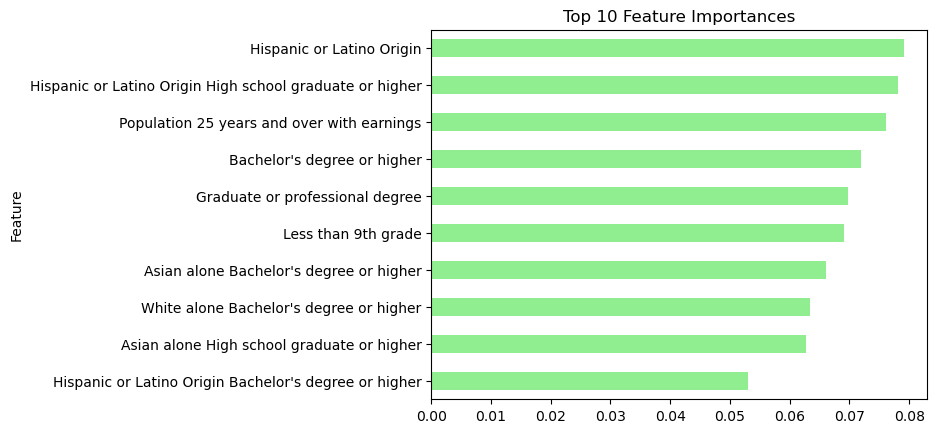

In [618]:
importances = rf_model.feature_importances_

# Sort the feature importances in descending order and select the top 5
top_5_features = sorted(zip(importances, X.columns), reverse=True)[:10]

# Create a DataFrame for visualization
importances_df = pd.DataFrame(top_5_features, columns=['Feature Importances', 'Feature'])
importances_df.set_index('Feature', inplace=True)

# Sort the DataFrame by 'Feature Importances' in ascending order
importances_sorted = importances_df.sort_values(by='Feature Importances', ascending=True)

# Visualize the top 5 features by importance
importances_sorted.plot(kind='barh', color='lightgreen', title='Top 10 Feature Importances', legend=False)

In [619]:
X.columns

Index(['Population 18 to 24 years', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college or associate's degree', 'Bachelor's degree or higher',
       'Population 25 years and over', 'Less than 9th grade',
       '9th to 12th grade, no diploma', 'Some college, no degree',
       'Associate's degree', 'Bachelor's degree',
       'Graduate or professional degree', 'Population 25 to 34 years',
       'Population 35 to 44 years', 'Population 45 to 64 years',
       'Population 65 years and over', 'White alone',
       'White alone High school graduate or higher',
       'White alone Bachelor's degree or higher', 'Black alone',
       'Black alone High school graduate or higher',
       'Black alone Bachelor's degree or higher', 'Asian alone',
       'Asian alone High school graduate or higher',
       'Asian alone Bachelor's degree or higher', 'Hispanic or Latino Origin',
       'Hispanic or Latino Origin High school graduate or highe

<AxesSubplot:title={'center':'Top 10 Least Importances'}, ylabel='Feature'>

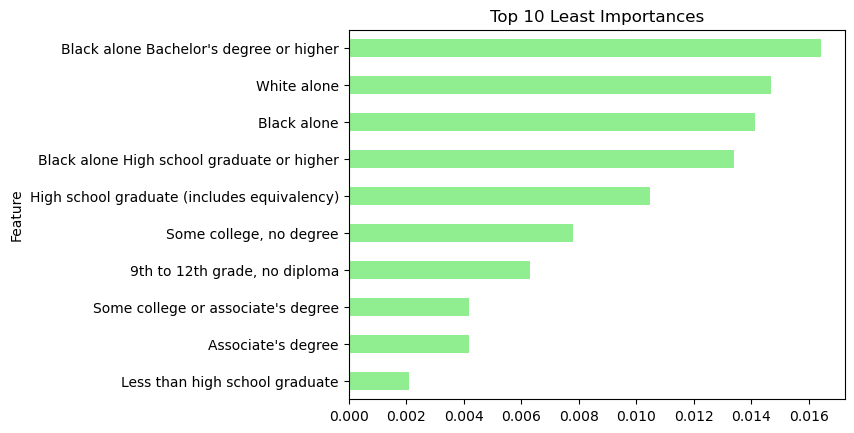

In [620]:
importances = rf_model.feature_importances_

# Sort the feature importances in descending order and select the top 5
top_5_features = sorted(zip(importances, X.columns), reverse=False)[:10]

# Create a DataFrame for visualization
importances_df = pd.DataFrame(top_5_features, columns=['Feature Importances', 'Feature'])
importances_df.set_index('Feature', inplace=True)

# Sort the DataFrame by 'Feature Importances' in ascending order
importances_sorted = importances_df.sort_values(by='Feature Importances', ascending=True)

# Visualize the top 5 features by importance
importances_sorted.plot(kind='barh', color='lightgreen', title='Top 10 Least Importances', legend=False)

In [621]:
# https://www.statology.org/how-to-calculate-vif-in-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                             variable  VIF
0                           Population 18 to 24 years  inf
1                      Less than high school graduate  inf
2         High school graduate (includes equivalency)  inf
3                  Some college or associate's degree  inf
4                         Bachelor's degree or higher  inf
5                        Population 25 years and over  inf
6                                 Less than 9th grade  inf
7                       9th to 12th grade, no diploma  inf
8                             Some college, no degree  inf
9                                  Associate's degree  inf
10                                  Bachelor's degree  inf
11                    Graduate or professional degree  inf
12                          Population 25 to 34 years  inf
13                          Population 35 to 44 years  inf
14                          Population 45 to 64 years  inf
15                       Population 65 years and over  i

c:\Users\m8rqu\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [622]:
Y = merge_va['Dosage_Per_Pop']
xs = X[["White alone","Black alone","Hispanic or Latino Origin","Asian alone"]]

In [623]:
# https://www.statology.org/how-to-calculate-vif-in-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["variable"] = xs.columns
vif_data["VIF"] = [variance_inflation_factor(xs.values, i) for i in range(xs.shape[1])]

print(vif_data)

                    variable        VIF
0                White alone  14.514911
1                Black alone   3.575162
2  Hispanic or Latino Origin  67.565566
3                Asian alone  46.501944


In [626]:
import statsmodels.api as sm

X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary statistics of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Dosage_Per_Pop   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                nan
Time:                        18:17:48   Log-Likelihood:                 523.86
No. Observations:                  19   AIC:                            -1010.
Df Residuals:                       0   BIC:                            -991.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

c:\Users\m8rqu\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\m8rqu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\m8rqu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\m8rqu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
